In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [22]:
df=pd.read_csv(r"Data\real_world_textile_dataset_5000.csv")
df.head()

,Product_ID,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,P00001,Sports Shoes,Men,Premium Textile Ltd,156,91,51,50,666,980,10,35280.0,8640.0
1,P00002,Leather Belt,Men,FashionKart Supplies,409,171,86,152,969,1412,15,102017.0,19652.0
2,P00003,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,182,221,573,15,76953.9,42035.9
3,P00004,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,57,389,934,25,44131.5,19624.5
4,P00005,Silk Saree,Kids,FashionKart Supplies,369,150,0,200,1040,1306,5,186105.0,30105.0


In [23]:
df.info()
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_ID         5000 non-null   object 
 1   Product_Name       5000 non-null   object 
 2   Category           5000 non-null   object 
 3   Supplier           5000 non-null   object 
 4   Demand_Index       5000 non-null   int64  
 5   Current_Stock_Qty  5000 non-null   int64  
 6   Stock_After_Sales  5000 non-null   int64  
 7   Reorder_Level      5000 non-null   int64  
 8   Purchase_Price     5000 non-null   int64  
 9   Selling_Price      5000 non-null   int64  
 10  Discount_%         5000 non-null   int64  
 11  Revenue            5000 non-null   float64
 12  Profit             5000 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 507.9+ KB
Shape: (5000, 13)


In [24]:
df.isnull().sum()

Product_ID           0
Product_Name         0
Category             0
Supplier             0
Demand_Index         0
Current_Stock_Qty    0
Stock_After_Sales    0
Reorder_Level        0
Purchase_Price       0
Selling_Price        0
Discount_%           0
Revenue              0
Profit               0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
neg_values = {col: df[df[col] < 0][col].count()
                for col in num_cols
                   if (df[col] < 0).any()}
print("\n No. of Negative Value ")
print(neg_values)



 No. of Negative Value 
{'Profit': np.int64(614)}


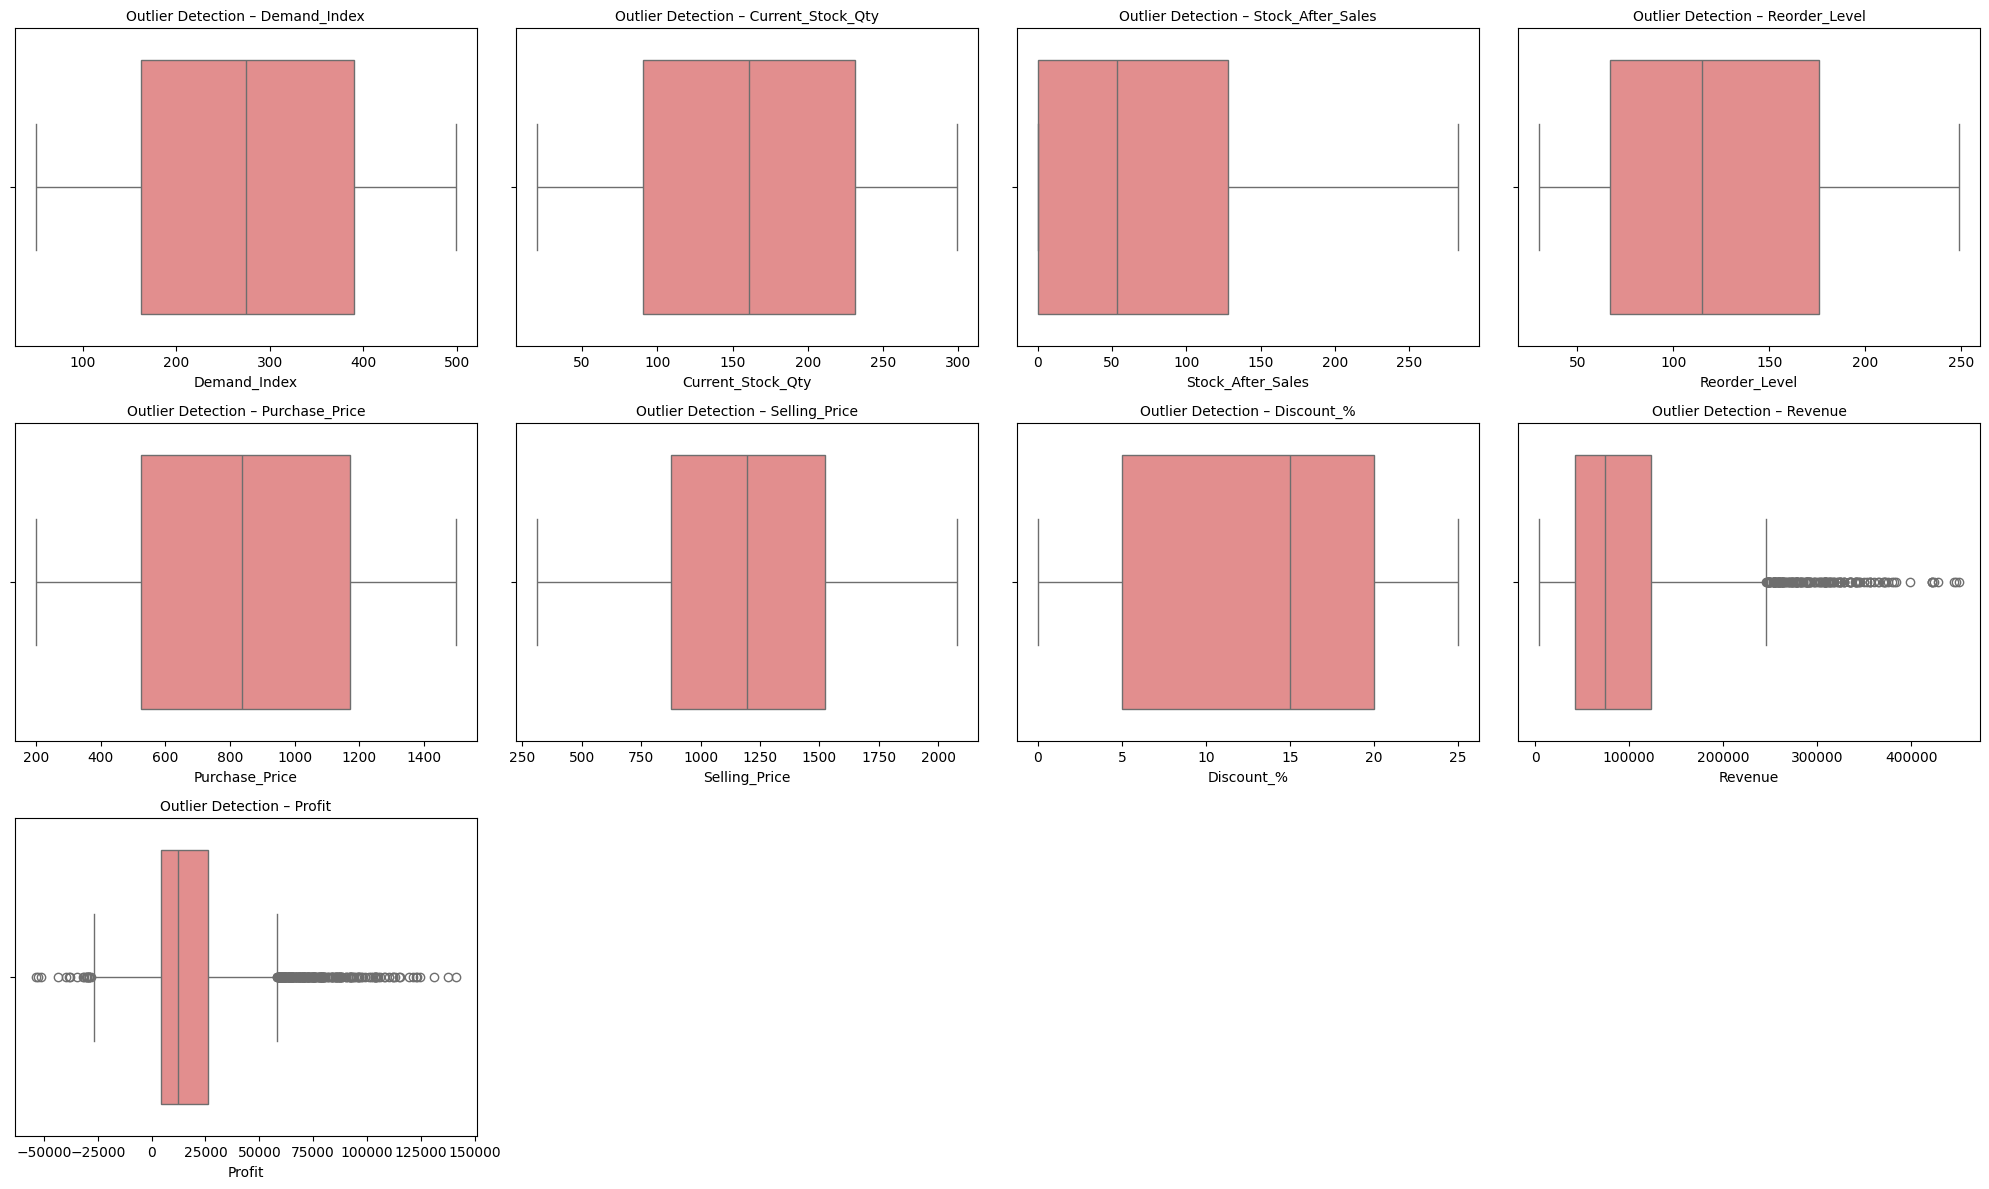

In [27]:
import math
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Outlier Detection – {col}", fontsize=10)
    plt.tight_layout()

plt.show()

In [28]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers")

Demand_Index: 0 outliers
Current_Stock_Qty: 0 outliers
Stock_After_Sales: 0 outliers
Reorder_Level: 0 outliers
Purchase_Price: 0 outliers
Selling_Price: 0 outliers
Discount_%: 0 outliers
Revenue: 174 outliers
Profit: 259 outliers


In [29]:
# df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['DayOfWeek'] = df['Date'].dt.dayofweek
# df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)


In [30]:
# df["Reason"]= df["Reason"].fillna("Not returned")
# df.head()

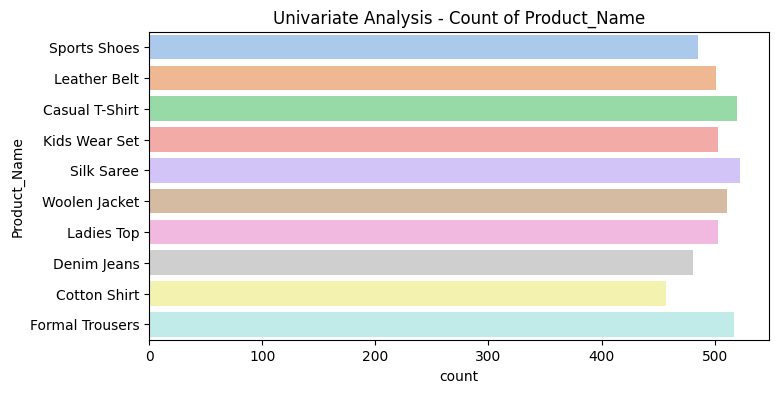

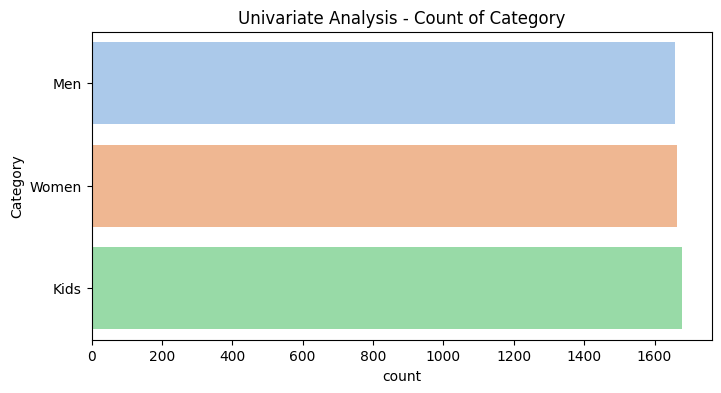

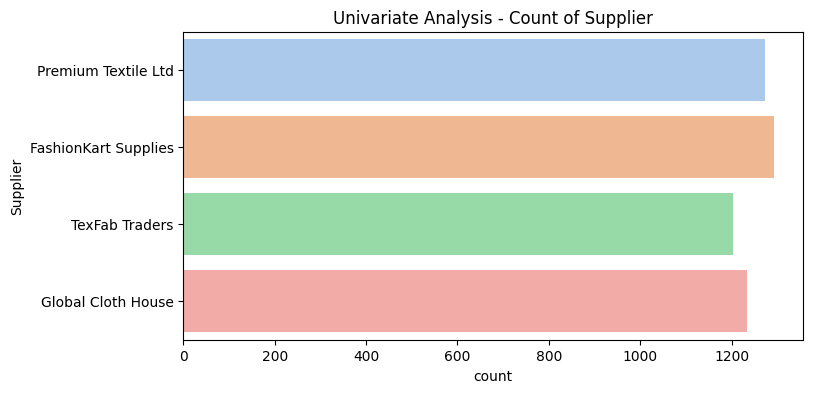

In [31]:
cat_cols = df.drop("Product_ID",axis=1).select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, palette="pastel")
    plt.title(f"Univariate Analysis - Count of {col}")
    plt.show()

In [32]:
numeric_df = df.select_dtypes(include=np.number)

# skewness & kurtosis
desc = numeric_df.describe().T
desc['skew'] = numeric_df.skew()
desc['kurtosis'] = numeric_df.kurtosis()

desc = desc.round(2)

print(" Statistical Summary:\n")
display(desc.style.background_gradient(cmap='Greens').set_caption("Descriptive Statistics with Skewness & Kurtosis"))

# Correlation matrix
corr_matrix = numeric_df.corr().round(2)
print("\n Correlation Matrix:\n")
display(corr_matrix.style.background_gradient(cmap='YlGnBu').set_caption("Feature Correlation Matrix"))

# Covariance matrix
cov_matrix = numeric_df.cov().round(2)
print("\n Covariance Matrix:\n")
display(cov_matrix.style.background_gradient(cmap='PuBu').set_caption("Feature Covariance Matrix"))

 Statistical Summary:



,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Demand_Index,5000.000000,275.200000,130.760000,50.000000,162.750000,275.000000,390.250000,499.000000,-0.010000,-1.210000
Current_Stock_Qty,5000.000000,160.470000,81.140000,20.000000,90.750000,161.000000,231.000000,299.000000,-0.010000,-1.200000
Stock_After_Sales,5000.000000,72.150000,74.540000,0.000000,0.000000,53.000000,128.000000,283.000000,0.720000,-0.660000
Reorder_Level,5000.000000,122.950000,63.830000,30.000000,67.000000,115.000000,176.000000,249.000000,0.340000,-1.100000
Purchase_Price,5000.000000,847.350000,375.320000,200.000000,525.000000,839.000000,1171.000000,1499.000000,0.020000,-1.190000
Selling_Price,5000.000000,1196.040000,401.780000,311.000000,874.000000,1196.000000,1523.000000,2079.000000,0.000000,-0.930000
Discount_%,5000.000000,12.540000,8.570000,0.000000,5.000000,15.000000,20.000000,25.000000,-0.010000,-1.290000
Revenue,5000.000000,92414.270000,67166.630000,4149.750000,42188.810000,74698.800000,123508.200000,450790.200000,1.420000,2.470000
Profit,5000.000000,17443.760000,20552.910000,-53771.250000,4435.910000,12403.500000,25960.000000,141252.000000,1.400000,3.410000



 Correlation Matrix:



,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
Demand_Index,1.000000,0.010000,-0.450000,0.880000,0.010000,0.010000,-0.010000,0.530000,0.330000
Current_Stock_Qty,0.010000,1.000000,0.770000,0.010000,-0.010000,-0.000000,0.000000,0.360000,0.220000
Stock_After_Sales,-0.450000,0.770000,1.000000,-0.390000,-0.010000,-0.010000,0.010000,-0.190000,-0.110000
Reorder_Level,0.880000,0.010000,-0.390000,1.000000,-0.010000,-0.010000,-0.010000,0.460000,0.280000
Purchase_Price,0.010000,-0.010000,-0.010000,-0.010000,1.000000,0.930000,0.000000,0.440000,-0.210000
Selling_Price,0.010000,-0.000000,-0.010000,-0.010000,0.930000,1.000000,0.010000,0.470000,-0.000000
Discount_%,-0.010000,0.000000,0.010000,-0.010000,0.000000,0.010000,1.000000,-0.130000,-0.430000
Revenue,0.530000,0.360000,-0.190000,0.460000,0.440000,0.470000,-0.130000,1.000000,0.490000
Profit,0.330000,0.220000,-0.110000,0.280000,-0.210000,-0.000000,-0.430000,0.490000,1.000000



 Covariance Matrix:



,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
Demand_Index,17097.340000,117.510000,-4401.720000,7353.080000,331.390000,290.270000,-13.540000,4692154.210000,876075.580000
Current_Stock_Qty,117.510000,6583.840000,4656.990000,71.280000,-234.260000,-148.950000,0.490000,1972659.220000,372414.690000
Stock_After_Sales,-4401.720000,4656.990000,5555.510000,-1850.380000,-368.790000,-199.730000,3.430000,-974139.450000,-162188.420000
Reorder_Level,7353.080000,71.280000,-1850.380000,4073.910000,-130.190000,-212.140000,-7.670000,1970129.220000,371785.680000
Purchase_Price,331.390000,-234.260000,-368.790000,-130.190000,140868.700000,140687.880000,15.250000,11084006.030000,-1593904.010000
Selling_Price,290.270000,-148.950000,-199.730000,-212.140000,140687.880000,161429.420000,42.430000,12565482.610000,-9870.310000
Discount_%,-13.540000,0.490000,3.430000,-7.670000,15.250000,42.430000,73.370000,-75477.230000,-76362.330000
Revenue,4692154.210000,1972659.220000,-974139.450000,1970129.220000,11084006.030000,12565482.610000,-75477.230000,4511355706.730000,678010528.310000
Profit,876075.580000,372414.690000,-162188.420000,371785.680000,-1593904.010000,-9870.310000,-76362.330000,678010528.310000,422422257.800000


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [34]:
df.head()

,Product_ID,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,P00001,Sports Shoes,Men,Premium Textile Ltd,156,91,51,50,666,980,10,35280.0,8640.0
1,P00002,Leather Belt,Men,FashionKart Supplies,409,171,86,152,969,1412,15,102017.0,19652.0
2,P00003,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,182,221,573,15,76953.9,42035.9
3,P00004,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,57,389,934,25,44131.5,19624.5
4,P00005,Silk Saree,Kids,FashionKart Supplies,369,150,0,200,1040,1306,5,186105.0,30105.0


## Droping the column

In [35]:
target = "Reorder_Level"

X = df.drop(columns=[target, 'Product_ID'], errors='ignore')
y = df[target]

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

In [36]:
X.head()

,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,Sports Shoes,Men,Premium Textile Ltd,156,91,51,666,980,10,35280.0,8640.0
1,Leather Belt,Men,FashionKart Supplies,409,171,86,969,1412,15,102017.0,19652.0
2,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,221,573,15,76953.9,42035.9
3,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,389,934,25,44131.5,19624.5
4,Silk Saree,Kids,FashionKart Supplies,369,150,0,1040,1306,5,186105.0,30105.0


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

In [38]:
X.head(10)

,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,8,1,2,156,91,51,666,980,10,35280.00,8640.00
1,6,1,0,409,171,86,969,1412,15,102017.00,19652.00
2,0,2,0,493,296,138,221,573,15,76953.90,42035.90
3,4,1,2,108,189,126,389,934,25,44131.50,19624.50
4,7,0,0,369,150,0,1040,1306,5,186105.00,30105.00
5,9,1,0,63,261,248,1097,1536,15,16972.80,2711.80
6,8,1,0,480,54,0,1225,1714,25,69417.00,3267.00
7,5,2,3,240,237,99,1195,1564,25,161874.00,-3036.00
8,8,1,1,345,232,83,416,767,15,97140.55,35156.55
9,4,1,2,350,84,0,847,1418,10,107200.80,36052.80


In [39]:
y.head(5)

0     50
1    152
2    182
3     57
4    200
Name: Reorder_Level, dtype: int64

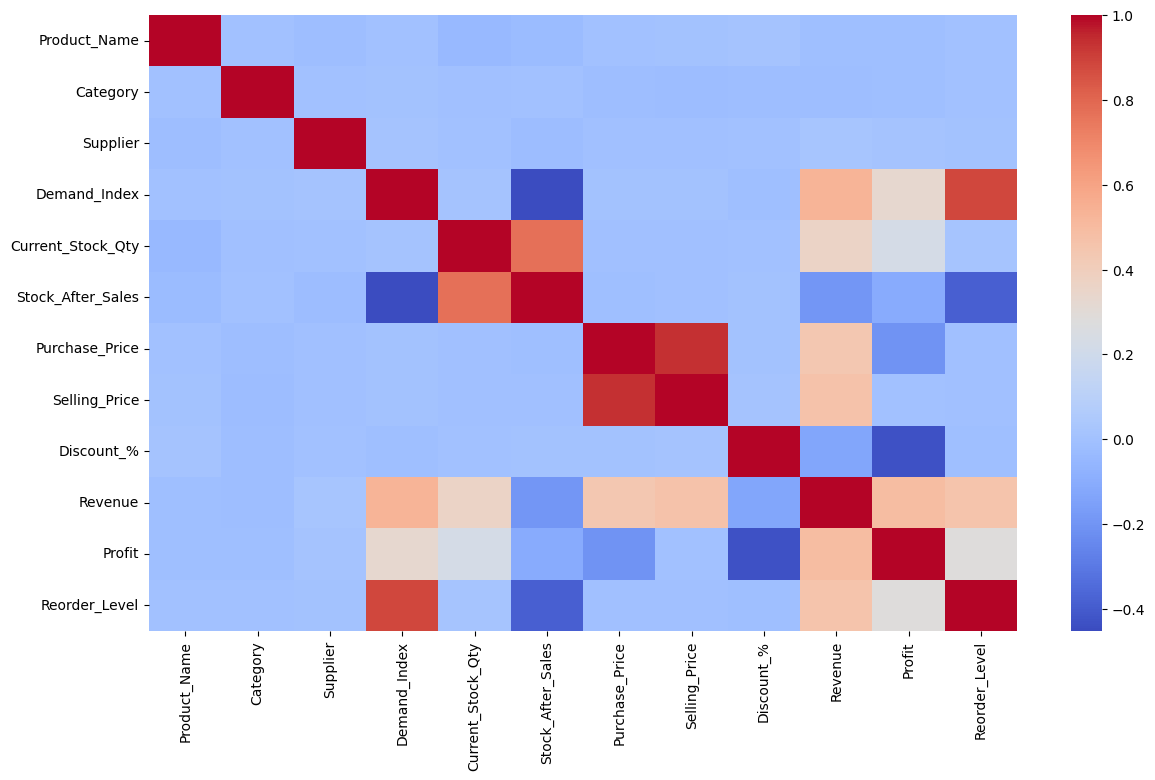

Reorder_Level        1.000000
Demand_Index         0.881048
Revenue              0.459553
Stock_After_Sales    0.388949
Profit               0.283409
Discount_%           0.014021
Current_Stock_Qty    0.013762
Selling_Price        0.008272
Purchase_Price       0.005435
Supplier             0.005431
Product_Name         0.003009
Category             0.000070
Name: Reorder_Level, dtype: float64


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for correlation by combining X (features) and y (target)
# X already has categorical features encoded
df_corr = pd.concat([X, y], axis=1)

corr = df_corr.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

# Rank features by correlation with target
corr_target = corr[target].abs().sort_values(ascending=False)
print(corr_target)

In [42]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X,y)
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi)


Demand_Index         1.099668
Revenue              0.195688
Stock_After_Sales    0.124156
Profit               0.104088
Product_Name         0.021718
Current_Stock_Qty    0.011037
Supplier             0.005922
Category             0.000000
Purchase_Price       0.000000
Discount_%           0.000000
Selling_Price        0.000000
dtype: float64


## Feature Selection

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X,y)
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

Demand_Index         0.897057
Profit               0.016878
Selling_Price        0.014843
Revenue              0.014056
Purchase_Price       0.013586
Current_Stock_Qty    0.013184
Stock_After_Sales    0.008627
Product_Name         0.008195
Discount_%           0.005373
Supplier             0.004746
Category             0.003456
dtype: float64


In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
print(xgb_importances.sort_values(ascending=False))


Demand_Index         0.868909
Revenue              0.015921
Selling_Price        0.015727
Profit               0.015246
Stock_After_Sales    0.014778
Purchase_Price       0.014397
Discount_%           0.014273
Current_Stock_Qty    0.013888
Category             0.009731
Supplier             0.009564
Product_Name         0.007566
dtype: float32


In [46]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold

model = ExtraTreesRegressor()
selector = RFECV(estimator=model, cv=KFold(5), scoring='r2')
selector.fit(X, y)
selected_features=X.columns[selector.support_]
print("Optimal Features:", selected_features)


Optimal Features: Index(['Product_Name', 'Supplier', 'Demand_Index', 'Current_Stock_Qty',
       'Stock_After_Sales', 'Purchase_Price', 'Selling_Price', 'Discount_%',
       'Revenue', 'Profit'],
      dtype='object')


In [47]:
selected_features

Index(['Product_Name', 'Supplier', 'Demand_Index', 'Current_Stock_Qty',
       'Stock_After_Sales', 'Purchase_Price', 'Selling_Price', 'Discount_%',
       'Revenue', 'Profit'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train = X_train[selected_features]
X_test  = X_test[selected_features]
X_train.head(5)

,Product_Name,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
4227,9,0,471,220,92,923,1459,25,140064.0,21920.0
4676,5,3,332,90,1,965,1479,0,131631.0,45746.0
800,3,1,218,41,0,583,982,20,32209.6,8306.6
3671,5,2,326,62,0,1492,1700,20,84320.0,-8184.0
4193,5,2,245,118,37,520,1066,0,86346.0,44226.0


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM": SVR(kernel="rbf")
}

In [52]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
results_df = results_df.sort_values(by="RMSE")

print("\nModel Comparison Results:\n")
print(results_df)


Model Comparison Results:

               Model        MAE       RMSE        R²
5  Gradient Boosting  18.486661  22.113070  0.869645
4      Random Forest  18.865290  22.713508  0.862470
6            XGBoost  19.879421  24.216792  0.843663
2              Lasso  24.249871  29.481851  0.768293
1              Ridge  24.255947  29.491802  0.768137
0  Linear Regression  24.278195  29.506522  0.767905
3      Decision Tree  24.512000  30.849214  0.746302
7                SVM  25.367770  31.832936  0.729864


In [53]:
best_model_name = results_df.iloc[0]["Model"]
best_rmse = results_df.iloc[0]["RMSE"]

print("Best Model:", best_model_name)
print("Best RMSE:", best_rmse)


Best Model: Gradient Boosting
Best RMSE: 22.113070302513183


In [54]:
best_model = models[best_model_name]
import joblib

joblib.dump(best_model, "Gradient_Boosting_model_RWTD.pkl")

['Gradient_Boosting_model_RWTD.pkl']

In [55]:
joblib.dump(scaler, "feature_scaler-RWTD.pkl")

['feature_scaler-RWTD.pkl']

In [66]:
import joblib

scaler = joblib.load("feature_scaler_RWTD.pkl")
print(scaler.feature_names_in_)


['Product_Name' 'Supplier' 'Demand_Index' 'Current_Stock_Qty'
 'Stock_After_Sales' 'Purchase_Price' 'Selling_Price' 'Discount_%'
 'Revenue' 'Profit']


In [56]:
print(y.describe())


count    5000.000000
mean      122.949600
std        63.827156
min        30.000000
25%        67.000000
50%       115.000000
75%       176.000000
max       249.000000
Name: Reorder_Level, dtype: float64


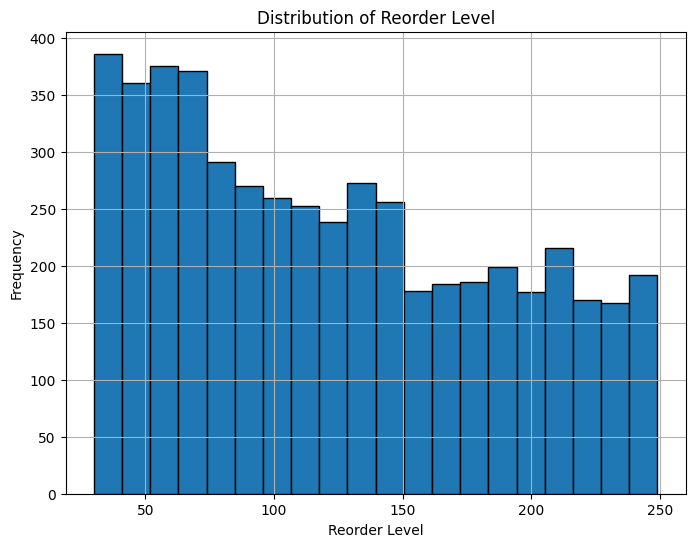

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, edgecolor='black')
plt.title('Distribution of Reorder Level')
plt.xlabel('Reorder Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Deep Learning   models

In [57]:
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# DL
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, GRU, Dense, Dropout, Bidirectional, Input, Attention)
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
def create_sequences(X, y, timesteps=30):
    Xs, ys = [], []
    for i in range(timesteps, len(X)):
        Xs.append(X[i-timesteps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

TIMESTEPS = 30

X_seq, y_seq = create_sequences(
    scaler.fit_transform(X),
    y.values,
    TIMESTEPS
)

split = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]


In [60]:
lstm = Sequential([
    LSTM(64, return_sequences=False, input_shape=(TIMESTEPS, X_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

lstm.compile(optimizer="adam", loss="mse")

lstm.fit(
    X_train_seq, y_train_seq,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 16790.6055 - val_loss: 15664.8584
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14487.3525 - val_loss: 14038.2910
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13046.0361 - val_loss: 12663.5732
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11788.0723 - val_loss: 11463.7178
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 10693.1914 - val_loss: 10401.3965
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9716.6934 - val_loss: 9469.8076
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8874.0576 - val_loss: 8640.8027
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8134.8555 - val_loss: 7917.2109
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7462.6294 - val_loss: 7283.9600
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6894.8110 - val_loss: 6736.5352
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6410.

In [61]:
gru = Sequential([
    GRU(64, return_sequences=False, input_shape=(TIMESTEPS, X_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

gru.compile(optimizer="adam", loss="mse")

gru.fit(
    X_train_seq, y_train_seq,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 17029.6016 - val_loss: 15997.3896
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14853.0400 - val_loss: 14394.9482
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13389.2754 - val_loss: 13013.1660
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12112.7129 - val_loss: 11787.6611
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11004.4150 - val_loss: 10708.3457
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 10002.1963 - val_loss: 9749.4395
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9121.1289 - val_loss: 8896.0322
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8364.5762 - val_loss: 8151.1162
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7680.9722 - val_loss: 7493.5957
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7073.0596 - val_loss: 6919.6118
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - los

In [62]:
bi_lstm = Sequential([
    Bidirectional(LSTM(64), input_shape=(TIMESTEPS, X_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

bi_lstm.compile(optimizer="adam", loss="mse")

bi_lstm.fit(
    X_train_seq, y_train_seq,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)


Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 15762.8271 - val_loss: 13705.9834
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12044.0928 - val_loss: 11015.2188
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9770.3926 - val_loss: 9012.9482
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8078.5908 - val_loss: 7530.6299
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6868.0381 - val_loss: 6427.5190
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5960.5449 - val_loss: 5633.4429
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5317.7490 - val_loss: 5063.7549
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4876.5205 - val_loss: 4677.3677
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4581.1362 - val_loss: 4414.0854
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4404.8086 - val_loss: 4247.1904
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 428

In [63]:
inputs = Input(shape=(TIMESTEPS, X_seq.shape[2]))

lstm_out = LSTM(64, return_sequences=True)(inputs)

attention = Attention()([lstm_out, lstm_out])
attention = Dense(32, activation="relu")(attention)

context = LSTM(32)(attention)
output = Dense(1)(context)

lstm_attention = Model(inputs, output)

lstm_attention.compile(optimizer="adam", loss="mse")

lstm_attention.fit(
    X_train_seq, y_train_seq,
    validation_split=0.1,
    epochs=40,
    batch_size=32,
    callbacks=[EarlyStopping(patience=6)],
    verbose=1
)


Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 17729.7969 - val_loss: 17189.7305
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 16368.2871 - val_loss: 16317.6836
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 15568.8975 - val_loss: 15543.4258
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 14835.2832 - val_loss: 14816.4473
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 14147.4277 - val_loss: 14134.2314
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 13497.5127 - val_loss: 13488.5098
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 12881.8203 - val_loss: 12873.9463
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 12297.7549 - val_loss: 12291.0010
Epoch 9/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 11743.9287 - val_loss: 11736.8887
Epoch 10/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 11218.1523 - val_loss: 11213.5527
Epoch 11/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/

In [64]:
def evaluate(y_true, y_pred, model_name):
    print(model_name)
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))
    print("-" * 40)


In [65]:
# evaluate(y_test, rf_preds, "Random Forest")
# evaluate(y_test, xgb_preds, "XGBoost")

evaluate(y_test_seq, lstm.predict(X_test_seq), "LSTM")
evaluate(y_test_seq, gru.predict(X_test_seq), "GRU")
evaluate(y_test_seq, bi_lstm.predict(X_test_seq), "Bi-LSTM")
evaluate(y_test_seq, lstm_attention.predict(X_test_seq), "LSTM + Attention")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
LSTM
MAE: 54.26614761352539
RMSE: 63.06988814811411
R2: -1.9073486328125e-05
----------------------------------------
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
GRU
MAE: 54.25324630737305
RMSE: 63.06935395422348
R2: -2.1457672119140625e-06
----------------------------------------
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Bi-LSTM
MAE: 54.42583465576172
RMSE: 63.106278164299944
R2: -0.0011733770370483398
----------------------------------------
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
LSTM + Attention
MAE: 53.96815872192383
RMSE: 64.0194596270345
R2: -0.030358076095581055
----------------------------------------
